In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
with open("north_data.json","rt") as INFILE:
    data = json.load(INFILE)

In [3]:
data

{'data': [{'date': '2022-11-10',
   'cases': None,
   'LFD Tests': None,
   'male deaths': None,
   'female deaths': None,
   'vaccinations': None,
   'mechanical_ventilator': None,
   'hospital-cases': 272},
  {'date': '2022-11-09',
   'cases': None,
   'LFD Tests': None,
   'male deaths': None,
   'female deaths': None,
   'vaccinations': None,
   'mechanical_ventilator': None,
   'hospital-cases': 290},
  {'date': '2022-11-08',
   'cases': None,
   'LFD Tests': None,
   'male deaths': None,
   'female deaths': None,
   'vaccinations': None,
   'mechanical_ventilator': None,
   'hospital-cases': 303},
  {'date': '2022-11-07',
   'cases': None,
   'LFD Tests': None,
   'male deaths': None,
   'female deaths': None,
   'vaccinations': None,
   'mechanical_ventilator': None,
   'hospital-cases': 320},
  {'date': '2022-11-06',
   'cases': None,
   'LFD Tests': None,
   'male deaths': None,
   'female deaths': None,
   'vaccinations': None,
   'mechanical_ventilator': None,
   'hospital-c

In [23]:
data_list = data['data']
data_list

[{'date': '2022-11-10',
  'cases': None,
  'LFD Tests': None,
  'male deaths': None,
  'female deaths': None,
  'vaccinations': None,
  'mechanical_ventilator': None,
  'hospital-cases': 272},
 {'date': '2022-11-09',
  'cases': None,
  'LFD Tests': None,
  'male deaths': None,
  'female deaths': None,
  'vaccinations': None,
  'mechanical_ventilator': None,
  'hospital-cases': 290},
 {'date': '2022-11-08',
  'cases': None,
  'LFD Tests': None,
  'male deaths': None,
  'female deaths': None,
  'vaccinations': None,
  'mechanical_ventilator': None,
  'hospital-cases': 303},
 {'date': '2022-11-07',
  'cases': None,
  'LFD Tests': None,
  'male deaths': None,
  'female deaths': None,
  'vaccinations': None,
  'mechanical_ventilator': None,
  'hospital-cases': 320},
 {'date': '2022-11-06',
  'cases': None,
  'LFD Tests': None,
  'male deaths': None,
  'female deaths': None,
  'vaccinations': None,
  'mechanical_ventilator': None,
  'hospital-cases': 325},
 {'date': '2022-11-05',
  'cases': 

In [27]:
data_dictionary_cases = data_list[''] 
data_dictionary_cases

TypeError: list indices must be integers or slices, not str

TypeError: 'NoneType' object is not iterable

In [38]:
start = date_as_pandas(data_dictionary[0])
end = date_as_pandas(data_dictionary[-1])
print(start , " to " , end)

2020-03-01 00:00:00  to  2022-11-10 00:00:00


In [41]:
index = pd.date_range(start,end, freq='D')
north_dataframe = pd.DataFrame(index=index,columns=['cases','hospital-cases','mechanical_ventilator'])
north_dataframe

,cases,hospital-cases,mechanical_ventilator
2020-03-01,NaN,NaN,NaN
2020-03-02,NaN,NaN,NaN
2020-03-03,NaN,NaN,NaN
2020-03-04,NaN,NaN,NaN
2020-03-05,NaN,NaN,NaN
...,...,...,...
2022-11-06,NaN,NaN,NaN
2022-11-07,NaN,NaN,NaN
2022-11-08,NaN,NaN,NaN
2022-11-09,NaN,NaN,NaN


In [42]:
for entries in data_list:
    date = date_as_pandas(entries['date'])
    for column in ['cases','hospital-cases','mechanical_ventilator']:
        if pd.isna(north_dataframe.loc[date,column]):
            value = float(entries[column]) if entries[column] != None else 0.0
            north_dataframe.loc[date,column]=value
north_dataframe.fillna(0.0, inplace=True)

north_dataframe
        
    

,cases,hospital-cases,mechanical_ventilator
2020-03-01,0.0,11.0,0.0
2020-03-02,0.0,12.0,0.0
2020-03-03,0.0,12.0,0.0
2020-03-04,0.0,12.0,0.0
2020-03-05,0.0,13.0,0.0
...,...,...,...
2022-11-06,0.0,325.0,0.0
2022-11-07,0.0,320.0,0.0
2022-11-08,0.0,303.0,0.0
2022-11-09,0.0,290.0,0.0


<AxesSubplot:>

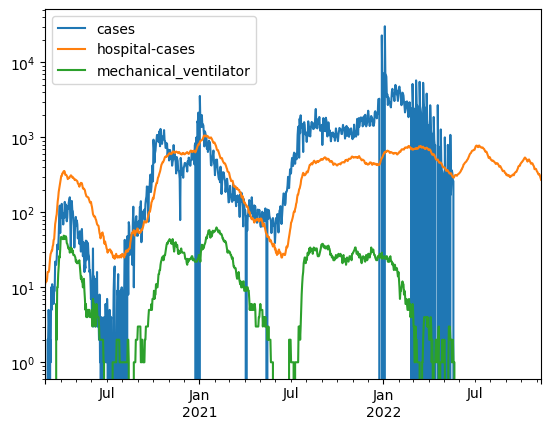

In [43]:
north_dataframe.plot(logy=True)

In [44]:
north_dataframe.to_pickle("north.pkl")